In [6]:
import torch
import matplotlib.pyplot as plt
from os import environ
import numpy as np
from src.utilities import get_gd_directory


def plot_result(dataset, arch_id, loss, width, bias, init_bias, init_weight, batch_norm, layer_norm, lr_list, st=0, freq=10, scale="log", factor=10., starting=0, seed=0):
    lr_list = np.array(lr_list)
    lr_list = lr_list[st:st+5]
    lr_num = lr_list.shape[0]
    plt.figure(figsize=(15, 15), dpi=100)
    title = f"{dataset}/{arch_id}/seed_0/{loss}/gd/{init_weight}_lr_{lr_list}"
    if batch_norm:
        title = f"{dataset}/{arch_id}_BN/seed_{seed}/{loss}/gd/{init_weight}_lr_{lr_list}" 
    if layer_norm:
        title = f"{dataset}/{arch_id}_LN/seed_{seed}/{loss}/gd/{init_weight}_lr_{lr_list}" 
    
    plt.suptitle(title)
    print(lr_num)
    for i, lr in enumerate(lr_list):
    # for i, lr in enumerate(np.arange(0.1, 0.2, 0.02)):
        # gd_lr = 0.01
        gd_lr = lr
        # gd_eig_freq = freq if isinstance(freq, int) else freq[i]

        # gd_directory = f"./results/{dataset}/{arch}/seed_0/{loss}/gd/lr_{gd_lr}"
        gd_directory = get_gd_directory(dataset, lr, arch_id, seed, "gd", loss, 0.0, width=width, bias=bias, init_bias=init_bias, init_weight=init_weight, batch_norm=batch_norm, layer_norm=layer_norm)

        gd_train_loss = torch.load(f"{gd_directory}/train_loss_final")[starting:]
        gd_train_acc = torch.load(f"{gd_directory}/train_acc_final")[starting:]
        gd_test_loss = torch.load(f"{gd_directory}/test_loss_final")[starting:]
        gd_test_acc = torch.load(f"{gd_directory}/test_acc_final")[starting:]
        gd_sharpness = torch.load(f"{gd_directory}/eigs_final")[:,0][starting:]
        gd_w1 = torch.load(f"{gd_directory}/w1_final")[starting:]
        gd_w2 = torch.load(f"{gd_directory}/w2_final")[starting:]

        # gd_steps = range(0, gd_sharpness.size(dim=0)*gd_eig_freq, gd_eig_freq)
        gd_eig_freq = gd_train_loss.shape[0] / gd_sharpness.shape[0]

        plt.subplot(4, lr_num, lr_num*0+i+1)
        # plt.xlim(1, 20000)
        plt.plot(gd_train_loss, label='training loss')
        plt.plot(gd_test_loss, label='test loss')
        # plt.xscale('log')
        plt.yscale(scale)
        # plt.plot(gd_steps, gd_sharpness/factor)
        plt.title("loss")
        plt.legend()

        plt.subplot(4, lr_num, lr_num*1+i+1)
        # plt.xlim(1, 20000)
        # plt.xscale('log')
        plt.plot(gd_train_acc, label='training acc')
        plt.plot(gd_test_acc, label='test acc')
        plt.title("accuracy")
        plt.legend()

        plt.subplot(4, lr_num, lr_num*2+i+1)
        # plt.xlim(1, 20000)
        # plt.xscale('log')

        # lin_coef = np.polyfit(gd_steps, gd_sharpness, 1)
        # lin_pred = np.poly1d(lin_coef)
        # plt.plot(gd_steps, lin_pred(gd_steps), '--')
        # plt.scatter(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness, s=1)
        plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_sharpness)
        plt.axhline(2. / gd_lr, linestyle='dotted')
        plt.yscale(scale)
        plt.title("sharpness")

        ax4 = plt.subplot(4, lr_num, lr_num*3+i+1)
        # ax4.set_xlim(1, 20000)
        # ax4.set_xscale('log')
        ax4.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, (gd_w1 - gd_w2 )**2, label="(w1-w2)^2")
        ax4.legend()

        # plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_w1 , label="w1")
        # plt.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, gd_w2 , label="w2")

        # ax5 = ax4.twinx()
        # input_dim = 28*28 if dataset == 'mnist' else 32*32*3
        print(gd_sharpness[0], gd_w1[0], gd_w2[0], gd_eig_freq)
        # ax5.plot(torch.arange(len(gd_sharpness)) * gd_eig_freq, (gd_w1 / np.sqrt(input_dim) - gd_w2 / np.sqrt(10))**2, label="(w1-w2)^2 (normalized)", color='r')
        # ax5.legend()
        
        # plt.yscale(scale)
        plt.title("weight")

        plt.xlabel("iteration")
    title = title.replace('/', '_')
    plt.savefig(f'results/1015/{title}.png')

5
2000000 5000


KeyboardInterrupt: 

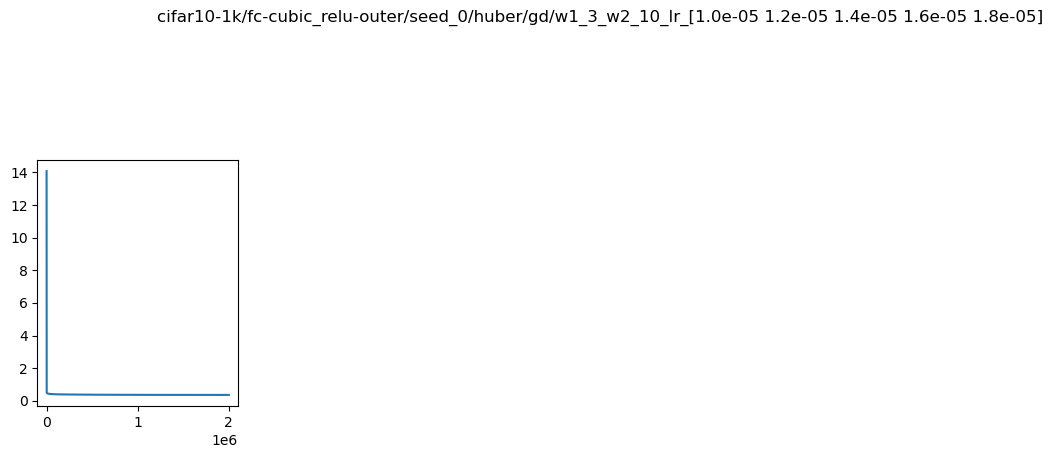

In [6]:
dataset = "cifar10-1k"
arch_list = ["fc-relu-depth1", "fc-tanh-depth1"]
# arch_list = ["fc-relu-depth1"]
arch_list = ["fc-relu-depth1"]
loss = "mse"
# lr_list = np.array([0.0001, 0.0002, 0.0004, 0.001, 0.002])
lr_list = np.array([0.0008])
# lr_list = np.array([0.01, 0.02, 0.04, 0.1, 0.2])
st = 0
# freq = [40] * 2 + [20] * 3
# freq = [40] * 4 + [400]

width = 200
bias = False
init_bias = "b_init"
init_weight = "w1_1_w2_1"
batch_norm = True

lr_list_mse_relu = {
    "w1_1_w2_1": [0.07, 0.08, 0.09], 
    "w1_1_w2_2": [0.02, 0.025, 0.03], 
    "w1_1_w2_5": [0.003, 0.0035, 0.004], 
    "w1_1_w2_10": [0.0013],

    "w1_5_w2_20": [0.0001, 0.00015, 0.0002, 0.00022, 0.00025, 0.00028],
    "w1_6_w2_20": [0.0001, 0.00023, 0.00025, 0.00027, 0.0003],
    # "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    "w1_3_w2_20": [0.0001, 0.00015, 0.0002, 0.00021, 0.00022, 0.00023, 0.00025], 

    "w1_4_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003], 
    }
lr_list_mse_tanh = {
    "w1_1_w2_1": [], 
    "w1_1_w2_2": [], 
    "w1_1_w2_5": [], 
    "w1_1_w2_10": [0.0009], 
    # "w1_1_w2_1": [0.01, 0.03, 0.05], 
    # "w1_1_w2_2": [0.01, 0.015, 0.02], 
    # "w1_1_w2_5": [0.01, 0.015, 0.02], 
    # "w1_1_w2_10": [0.01, 0.015, 0.02]

    "w1_5_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_6_w2_20": [0.0003, 0.00035, 0.0004, 0.00045, 0.0005],

    "w1_3_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003], 
    "w1_4_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003], 
}

lr_list_huber_relu = {
    # "w1_1_w2_1": [0.08, 0.1, 0.11], 
    # "w1_1_w2_1": [0.07, 0.09], 
    "w1_1_w2_1": [], 
    "w1_1_w2_2": [], 
    "w1_1_w2_5": [], 
    "w1_1_w2_10": [0.001], 
    # "w1_1_w2_2": [0.02, 0.03, 0.04], 
    # "w1_1_w2_5": [0.02, 0.03, 0.04], 
    # "w1_1_w2_10": [0.02, 0.03, 0.04] 
    "w1_6_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_5_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_3_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005], 
    "w1_4_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005], 
    }
lr_list_huber_tanh = {
    # "w1_1_w2_1": [0.01, 0.03, 0.05], 
    # "w1_1_w2_2": [0.01, 0.015, 0.02], 
    # "w1_1_w2_5": [0.01, 0.015, 0.02], 
    # "w1_1_w2_10": [0.01, 0.015, 0.02]
    "w1_1_w2_1": [], 
    "w1_1_w2_2": [], 
    "w1_1_w2_5": [], 
    "w1_1_w2_10": [0.0004, 0.0006, 0.0007, 0.0009, 0.001, 0.0011, 0.0012, 0.0013], 

    "w1_6_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_5_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_3_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],
    "w1_4_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],

}

lr_list_mse_cubicrelu = {
    "w1_1_w2_1": [0.01, 0.015, 0.02], 
    "w1_1_w2_2": [0.01, 0.015, 0.02], 
    "w1_1_w2_5": [0.005, 0.08, 0.01], 
    "w1_1_w2_10": [0.0002, 0.005, 0.008], 
    "w1_10_w2_1": [0.002, 0.0025, 0.003, 0.0035, 0.0036], 
    "w1_10_w2_2": [0.0004, 0.0005, 0.0006, 0.0007, 0.0008] ,


    "w1_2_w2_20": [0.003, 0.0035, 0.004],
    "w1_5_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],


    "w1_3_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    "w1_4_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    
    "w1_6_w2_20": [0.00002, 0.00006, 0.0001, 0.00014, 0.00018],
    "w1_8_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_10_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    }

lr_list_huber_cubicrelu = {
    "w1_3_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    "w1_4_w2_20": [0.0001, 0.0005, 0.0009, 0.0013, 0.0017],
    "w1_5_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    # "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    "w1_6_w2_20": [0.0001, 0.0003, 0.0005, 0.0007, 0.0009],
    "w1_10_w2_2": [0.0015, 0.002, 0.0023], 
    "w1_20_w2_5": [0.0001, 0.0005],
    "w1_40_w2_20": [0.00001, 0.00005],
    }

lr_list_mse_cubicrelu_double = {
    "w1_3_w2_15": [0.00005, 0.0001, 0.00015, 0.0002],
    "w1_6_w2_15": [0.000005, 0.00001, 0.000015, 0.00002],
    }
lr_list_huber_cubicrelu_double = {
    "w1_3_w2_15": [0.0001, 0.0002, 0.0003, 0.0004],
    "w1_6_w2_15": [0.00003, 0.00006, 0.00009, 0.00012, 0.00015],
    }
lr_list_mse_cubicrelu_outer = {
    "w1_6_w2_20": [0.000005, 0.00001, 0.00005],
    }
lr_list_huber_cubicrelu_outer = {
    "w1_3_w2_10": [0.00001, 0.000012, 0.000014, 0.000016, 0.000018],
    }

lr_list_mse_relu_BN = {
    "w1_1_w2_1": [0.02, 0.03, 0.04], 
    "w1_1_w2_2": [0.02, 0.03, 0.04], 
    "w1_1_w2_5": [0.02, 0.03, 0.04], 
    "w1_1_w2_10": [0.02, 0.03, 0.04],

    "w1_5_w2_20": [0.0003, 0.0004, 0.0005],
    "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    # "w1_6_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_3_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],
    "w1_4_w2_20": [5e-5, 0.0001, 0.00015, 0.0002, 0.00025],
    }
lr_list_mse_cubicrelu_BN = {
    "w1_6_w2_20": [0.00002, 0.00006, 0.0001, 0.00014, 0.00018],
    }
lr_list_huber_cubicrelu_outer_BN = {
    "w1_3_w2_10": [0.00001, 0.000012, 0.000014, 0.000016, 0.000018],
    }

lr_list_mse_relu_LN = {
    # "w1_6_w2_20": [0.0001, 0.00015, 0.0002, 0.00025, 0.0003],
    # "w1_6_w2_20": [0.02, 0.04, 0.06, 0.08, 0.1],
    "w1_6_w2_20": [0.01, 0.02],
}

# for weight in ["w1_10_w2_1", "w1_20_w2_1", "w1_20_w2_2", "w1_20_w2_3"]:
freq = [400] * 5
st = 0
for weight in ["w1_6_w2_20"]:
    break
# #     # plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_relu[weight], st, freq, "linear", starting=0)
# #     # plot_result(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_tanh[weight], st, freq, "linear", starting=0)
# # #     plot_result(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_relu[weight], st, freq, "linear", starting=0)
# #     # plot_result(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_tanh[weight], st, freq, "linear", starting=0)
#     # plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, True, False, lr_list_mse_relu_BN[weight], st, freq, "linear", starting=0)
# # #     plot_result(dataset, 'fc-cubic_relu-depth1', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_cubicrelu[weight], st, freq, "linear", seed=0)
#     # plot_result(dataset, 'fc-cubic_relu-depth1', 'mse', width, bias, init_bias, weight, True, False, lr_list_mse_cubicrelu_BN[weight], st, freq, "log", starting=0, seed=1)
#     plot_result(dataset, 'fc-cubic_relu-depth1', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_cubicrelu[weight], st, freq, "linear", starting=0, seed=0)

#     plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [40]*5, "log", starting=0)
#     plot_result(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [40]*5, "log", starting=0)
    # plot_result(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [10]*5, "log", starting=0)
    # plot_result(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [10]*5, "log", starting=0)

for weight in ["w1_3_w2_10"]:
    # break
    # plot_result(dataset, 'fc-cubic_relu-outer', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_cubicrelu_outer[weight], st, [40]*5, "linear", starting=0, seed=0)
    plot_result(dataset, 'fc-cubic_relu-outer', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_cubicrelu_outer[weight], st, [400]*5, "log", starting=0, seed=0)
    # plot_result(dataset, 'fc-cubic_relu-outer', 'huber', width, bias, init_bias, weight, True, False, lr_list_huber_cubicrelu_outer_BN[weight], st, [400]*5, "log", starting=0, seed=0)


# for arch_id in arch_list:
    # plot_result(dataset, arch_id, loss, width, bias, init_bias, init_weight, batch_norm, lr_list, st, freq, "log", starting=0)

## MNIST

5
tensor(4053.4602) tensor(8.0000) tensor(40.) 40.0
tensor(4053.4602) tensor(8.0000) tensor(40.) 40.0
tensor(4053.4602) tensor(8.0000) tensor(40.) 40.0
tensor(4053.4602) tensor(8.0000) tensor(40.) 40.0
tensor(4053.4602) tensor(8.0000) tensor(40.) 40.0


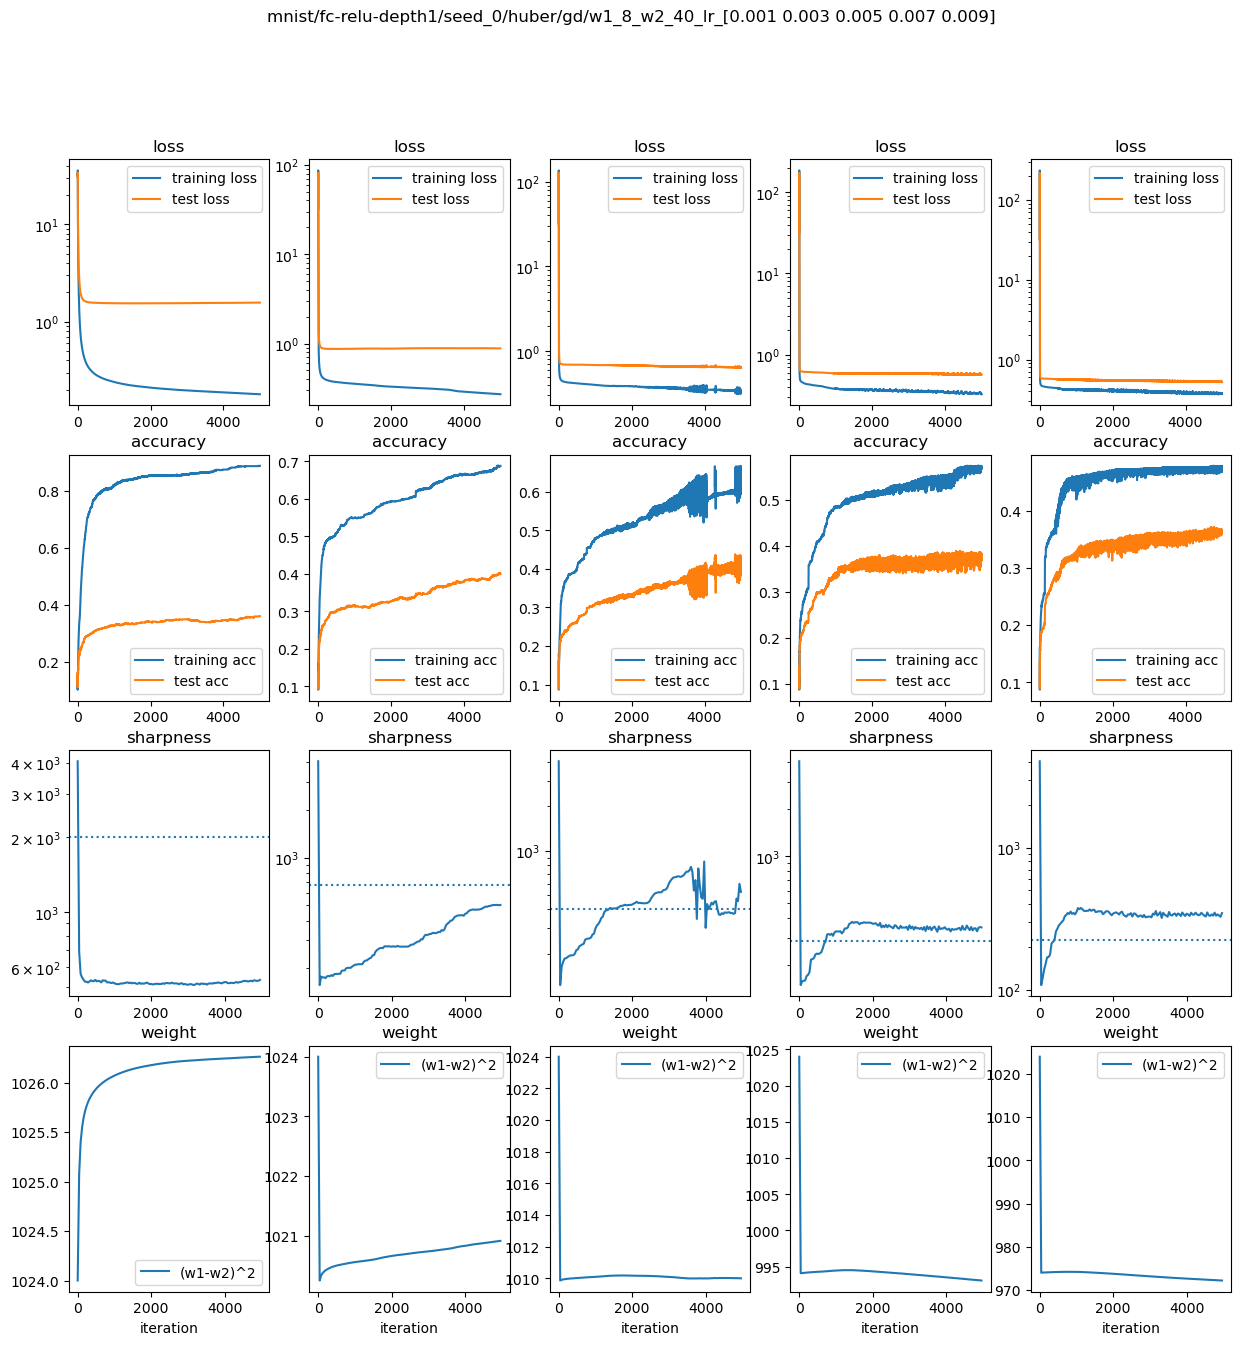

In [24]:
dataset = "mnist"
loss = "mse"
st = 0
freq = [40] * 5
width = 200
bias = False
init_bias = "b_init"
seed = 0

lr_list_mse_relu_mnist = {
    "w1_10_w2_40": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_12_w2_40": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_8_w2_40": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    }
lr_list_mse_tanh_mnist = {
    "w1_10_w2_40": [0.001, 0.003, 0.005, 0.007, 0.009],
}

lr_list_huber_relu_mnist = {
    "w1_10_w2_40": [0.012, 0.013, 0.015, 0.017, 0.02],
    "w1_12_w2_40": [0.001, 0.003, 0.005, 0.007, 0.009],
    "w1_8_w2_40": [0.001, 0.003, 0.005, 0.007, 0.009],
    }
lr_list_huber_tanh_mnist = {
    "w1_10_w2_40": [0.001, 0.003, 0.005, 0.007, 0.009],
}

lr_list_mse_relu_BN_mnist = {
    "w1_10_w2_40": [0.01, 0.02, 0.03, 0.04, 0.05],
    "w1_12_w2_40": [0.05, 0.1, 0.15, 0.025, 0.03],
    "w1_6_w2_15": [0.01, 0.03, 0.05, 0.07, 0.09],
    }

lr_list_mse_cubicrelu_mnist = {
    "w1_10_w2_40": [0.0001, 0.00012, 0.00014, 0.00016, 0.0002],
    }
lr_list_huber_cubicrelu_mnist = {
    "w1_10_w2_40": [0.001, 0.002, 0.003, 0.004, 0.005],
    }
lr_list_mse_cubicrelu_BN_mnist = {
    "w1_10_w2_40": [0.001, 0.002, 0.003, 0.004, 0.005],
    }
lr_list_huber_cubicrelu_BN_mnist = {
    "w1_10_w2_40": [0.001, 0.002, 0.003, 0.004, 0.005],
    "w1_5_w2_20": [0.001, 0.002, 0.003, 0.004, 0.005],
    "w1_6_w2_15": [0.001, 0.002, 0.003, 0.004, 0.005],
    "w1_6_w2_20": [0.001, 0.002, 0.003, 0.004, 0.005],
    }
lr_list_huber_cubicrelu_outer_mnist = {
    # "w1_8_w2_20": [0.0001, 0.0002, 0.0003, 0.0004, 0.0005],
    "w1_6_w2_15": [0.00001, 0.00002, 0.00003, 0.00004, 0.00005],
    }


for weight in ["w1_8_w2_40"]:
    # break
    # plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_relu_mnist[weight], st, freq, "log", starting=0)
    # plot_result(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_tanh_mnist[weight], st, freq, "linear", starting=0)
    plot_result(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_relu_mnist[weight], st, freq, "log", starting=0)
    # plot_result(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_tanh_mnist[weight], st, freq, "linear", starting=0)
    # plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, True, False, lr_list_mse_relu_BN_mnist[weight], st, freq, "linear", starting=1)
    # plot_result(dataset, 'fc-cubic_relu-depth1', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_cubicrelu_mnist[weight], st, freq, "log", seed=0)
    # plot_result(dataset, 'fc-cubic_relu-depth1', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_cubicrelu_mnist[weight], st, freq, "log", seed=0)
# for weight in ["w1_5_w2_20", "w1_6_w2_15", "w1_6_w2_20"]:
    # plot_result(dataset, 'fc-cubic_relu-depth1', 'huber', width, bias, init_bias, weight, True, False, lr_list_huber_cubicrelu_BN_mnist[weight], st, freq, "log", starting=1, seed=0)

# for weight in ["w1_6_w2_15"]:
    # plot_result(dataset, 'fc-cubic_relu-outer', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_cubicrelu_outer_mnist[weight], st, freq, "log", starting=0, seed=0)

#     plot_result(dataset, 'fc-relu-depth1', 'mse', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [40]*5, "log", starting=0)
#     plot_result(dataset, 'fc-tanh-depth1', 'mse', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [40]*5, "log", starting=0)
    # plot_result(dataset, 'fc-relu-depth1', 'huber', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [10]*5, "log", starting=0)
    # plot_result(dataset, 'fc-tanh-depth1', 'huber', width, bias, init_bias, weight, False, True, lr_list_mse_relu_LN[weight], st, [10]*5, "log", starting=0)

# for weight in ["w1_3_w2_10"]: 
#     # plot_result(dataset, 'fc-cubic_relu-outer', 'mse', width, bias, init_bias, weight, False, False, lr_list_mse_cubicrelu_outer[weight], st, [40]*5, "linear", starting=0, seed=0)
#     # plot_result(dataset, 'fc-cubic_relu-outer', 'huber', width, bias, init_bias, weight, False, False, lr_list_huber_cubicrelu_outer[weight], st, [400]*5, "linear", starting=0, seed=0)
#     plot_result(dataset, 'fc-cubic_relu-outer', 'huber', width, bias, init_bias, weight, True, False, lr_list_huber_cubicrelu_outer_BN[weight], st, [400]*5, "linear", starting=0, seed=0)

